# Model Summary

Num GPUs Available: 0
Training Directory Contents:
Root: C:\Users\sksan\OneDrive\Desktop\infosys intern\New folder (2)\train2
Directories: ['Age-Related Macular Degeneration', 'Branch Retinal Vein Occlusion', 'Cataract', 'Diabetic Retinopathy', 'Drusen', 'Glaucoma', 'Hypertension', 'Media Haze', 'Normal', 'Others', 'Pathological Myopia', 'Tessellation']
Files: []
--------------------
Root: C:\Users\sksan\OneDrive\Desktop\infosys intern\New folder (2)\train2\Age-Related Macular Degeneration
Directories: []
Files: ['102_left.jpg', '102_right.jpg', '1043_right.jpg', '1064_right.jpg', '1085_right.jpg', '1091_right.jpg', '1098_right.jpg', '1104_right.jpg', '1111_right.jpg', '126_left.jpg', '126_right.jpg', '1314_right.jpg', '136_left.jpg', '1458_right.jpg', '152_left.jpg', '152_right.jpg', '153_right.jpg', '158_left.jpg', '158_right.jpg', '160_right.jpg', '162_left.jpg', '162_right.jpg', '164_left.jpg', '164_right.jpg', '168_left.jpg', '168_right.jpg', '178_left.jpg', '178_right.jpg', '1799

c:\Users\sksan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.1592 - loss: 2.9171 - val_accuracy: 0.2658 - val_loss: 2.0715 - learning_rate: 3.0000e-04
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.3465 - loss: 2.1349 - val_accuracy: 0.3292 - val_loss: 1.8738 - learning_rate: 3.0000e-04
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.3838 - loss: 1.8806 - val_accuracy: 0.4042 - val_loss: 1.6500 - learning_rate: 3.0000e-04
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.4272 - loss: 1.7456 - val_accuracy: 0.4250 - val_loss: 1.5892 - learning_rate: 3.0000e-04
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.4351 - loss: 1.6630 - val_accuracy: 0.4758 - val_loss: 1.4571 - learning_rate: 3.0000e-04
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.4535 - loss: 1.5684 - val_accuracy: 0.5283 - val_loss: 1.3540 - learning_rate: 3.0000e-04
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.5278 

saved


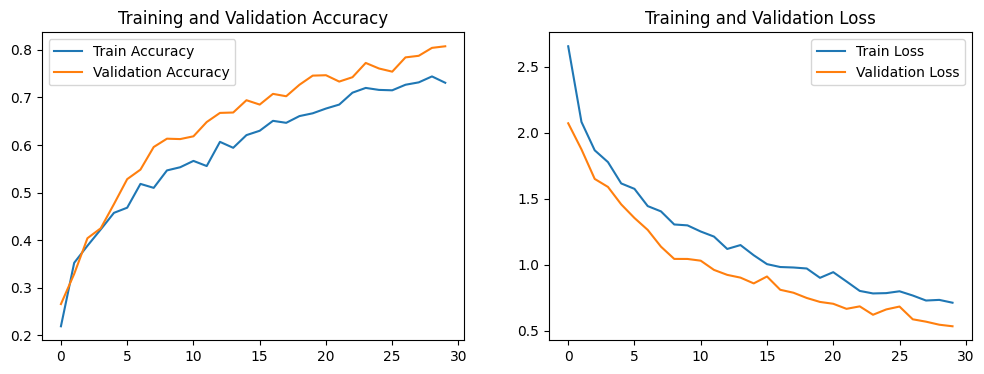

Found 1200 images in C:\Users\sksan\OneDrive\Desktop\infosys intern\New folder (2)\test2
Classes: {'Glaucoma', 'Cataract', 'Media Haze', 'Normal', 'Others', 'Age-Related Macular Degeneration', 'Diabetic Retinopathy', 'Drusen', 'Pathological Myopia', 'Hypertension', 'Tessellation', 'Branch Retinal Vein Occlusion'}
Found 1200 validated image filenames belonging to 12 classes.


c:\Users\sksan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8221 - loss: 0.5058
Final Test Loss: 0.5211
Final Test Accuracy: 81.67%
Final Training Accuracy: 73.08%
Final Validation Accuracy: 80.75%


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt



# Define Dataset Paths
train_dir = r"C:\Users\sksan\OneDrive\Desktop\infosys intern\New folder (2)\train2"
val_dir = r"C:\Users\sksan\OneDrive\Desktop\infosys intern\New folder (2)\val2"
test_dir = r"C:\Users\sksan\OneDrive\Desktop\infosys intern\New folder (2)\test2"

def create_dataframe(image_dir):
    class_labels = []
    filenames = []

    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                filenames.append(os.path.relpath(os.path.join(root, file), image_dir))
                class_labels.append(os.path.basename(os.path.dirname(os.path.join(root, file))))

  
    print(f"Found {len(filenames)} images in {image_dir}")
    print(f"Classes: {set(class_labels)}")

    return pd.DataFrame({'filename': filenames, 'class': class_labels})


def print_directory_contents(directory):
    for root, dirs, files in os.walk(directory):
        print(f"Root: {root}")
        print(f"Directories: {dirs}")
        print(f"Files: {files}")
        print("-" * 20)

print("Training Directory Contents:")
print_directory_contents(train_dir)

print("Validation Directory Contents:")
print_directory_contents(val_dir)


train_df = create_dataframe(train_dir)
val_df = create_dataframe(val_dir)


train_df.columns = train_df.columns.str.strip()
val_df.columns = val_df.columns.str.strip()


print("Train DataFrame columns:", train_df.columns)
print("Validation DataFrame columns:", val_df.columns)

print(train_df.head())
print(val_df.head())


print(train_df.dtypes)
print(val_df.dtypes)

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = datagen.flow_from_dataframe(
    train_df, directory=train_dir, x_col="filename", y_col="class",
    target_size=(224, 224), batch_size=32, class_mode="categorical"
)

val_data = datagen.flow_from_dataframe(
    val_df, directory=val_dir, x_col="filename", y_col="class",
    target_size=(224, 224), batch_size=32, class_mode="categorical"
)

num_classes = len(train_data.class_indices)


base_model = InceptionV3(
    weights='imagenet',  
    include_top=False,
    input_shape=(224, 224, 3)
)
for layer in base_model.layers[:200]:  
    layer.trainable = False


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])


callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
]

history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data,
    callbacks=callbacks
)

model.save("model231.h5")
print("saved")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_df = create_dataframe(test_dir)


test_data = datagen.flow_from_dataframe(
    test_df, directory=test_dir, x_col="filename", y_col="class",
    target_size=(224, 224), batch_size=32, class_mode="categorical"
)

final_loss, final_accuracy = model.evaluate(test_data)
print(f"Final Test Loss: {final_loss:.4f}")
print(f"Final Test Accuracy: {final_accuracy * 100:.2f}%")


final_train_accuracy = history.history['accuracy'][-1]  
final_val_accuracy = history.history['val_accuracy'][-1] 

print(f"Final Training Accuracy: {final_train_accuracy * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")